In [43]:
import pandas as pd
df=pd.read_csv(r'Course_Completion_Predicted.csv')
df.shape

(100000, 40)

In [ ]:
df.isnull().sum()

In [ ]:
df.dtypes

In [44]:
num_cols = df.select_dtypes(include='number').columns.tolist()
cat_cols = df.select_dtypes(include=['object', 'bool']).columns.tolist()


In [45]:
print(num_cols)
print(cat_cols)

['Age', 'Course_Duration_Days', 'Instructor_Rating', 'Login_Frequency', 'Average_Session_Duration_Min', 'Video_Completion_Rate', 'Discussion_Participation', 'Time_Spent_Hours', 'Days_Since_Last_Login', 'Notifications_Checked', 'Peer_Interaction_Score', 'Assignments_Submitted', 'Assignments_Missed', 'Quiz_Attempts', 'Quiz_Score_Avg', 'Project_Grade', 'Progress_Percentage', 'Rewatch_Count', 'Payment_Amount', 'App_Usage_Percentage', 'Reminder_Emails_Clicked', 'Support_Tickets_Raised', 'Satisfaction_Rating']
['Student_ID', 'Name', 'Gender', 'Education_Level', 'Employment_Status', 'City', 'Device_Type', 'Internet_Connection_Quality', 'Course_ID', 'Course_Name', 'Category', 'Course_Level', 'Enrollment_Date', 'Payment_Mode', 'Fee_Paid', 'Discount_Used', 'Completed']


In [46]:
binary_cols = [c for c in cat_cols if df[c].nunique() == 2]
ohe_cols    = [c for c in cat_cols if 3 <= df[c].nunique() <= 20]
high_cols   = [c for c in cat_cols if df[c].nunique() > 20]

print("Binary:", binary_cols)
print("OneHot:", ohe_cols)
print("High cardinality:", high_cols)


Binary: ['Fee_Paid', 'Discount_Used', 'Completed']
OneHot: ['Gender', 'Education_Level', 'Employment_Status', 'City', 'Device_Type', 'Internet_Connection_Quality', 'Course_ID', 'Course_Name', 'Category', 'Course_Level', 'Payment_Mode']
High cardinality: ['Student_ID', 'Name', 'Enrollment_Date']


In [47]:
df = df.drop(columns=high_cols, errors='ignore')


df.dtypes

import matplotlib.pyplot as plt
for col in cat_cols:
    plt.figure(figsize=(8,5))
    df.boxplot(column=col, by="Completed")
    plt.title(f"{col} Distribution by Completion")
    plt.suptitle("")
    plt.xlabel("Completed (0/1)")
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()

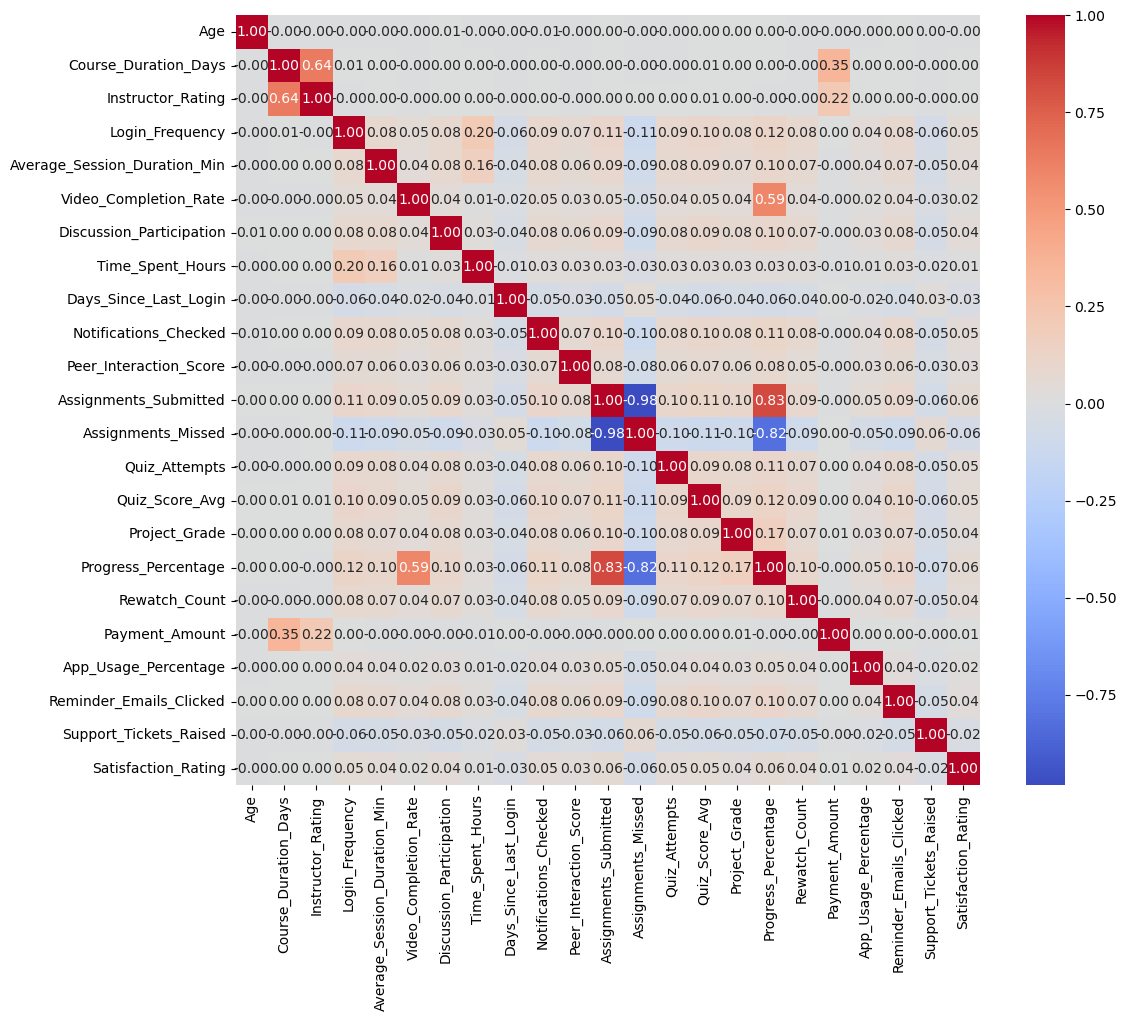

In [49]:

import matplotlib.pyplot as plt
import seaborn as sns
corr = df[num_cols].corr()

plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.show()


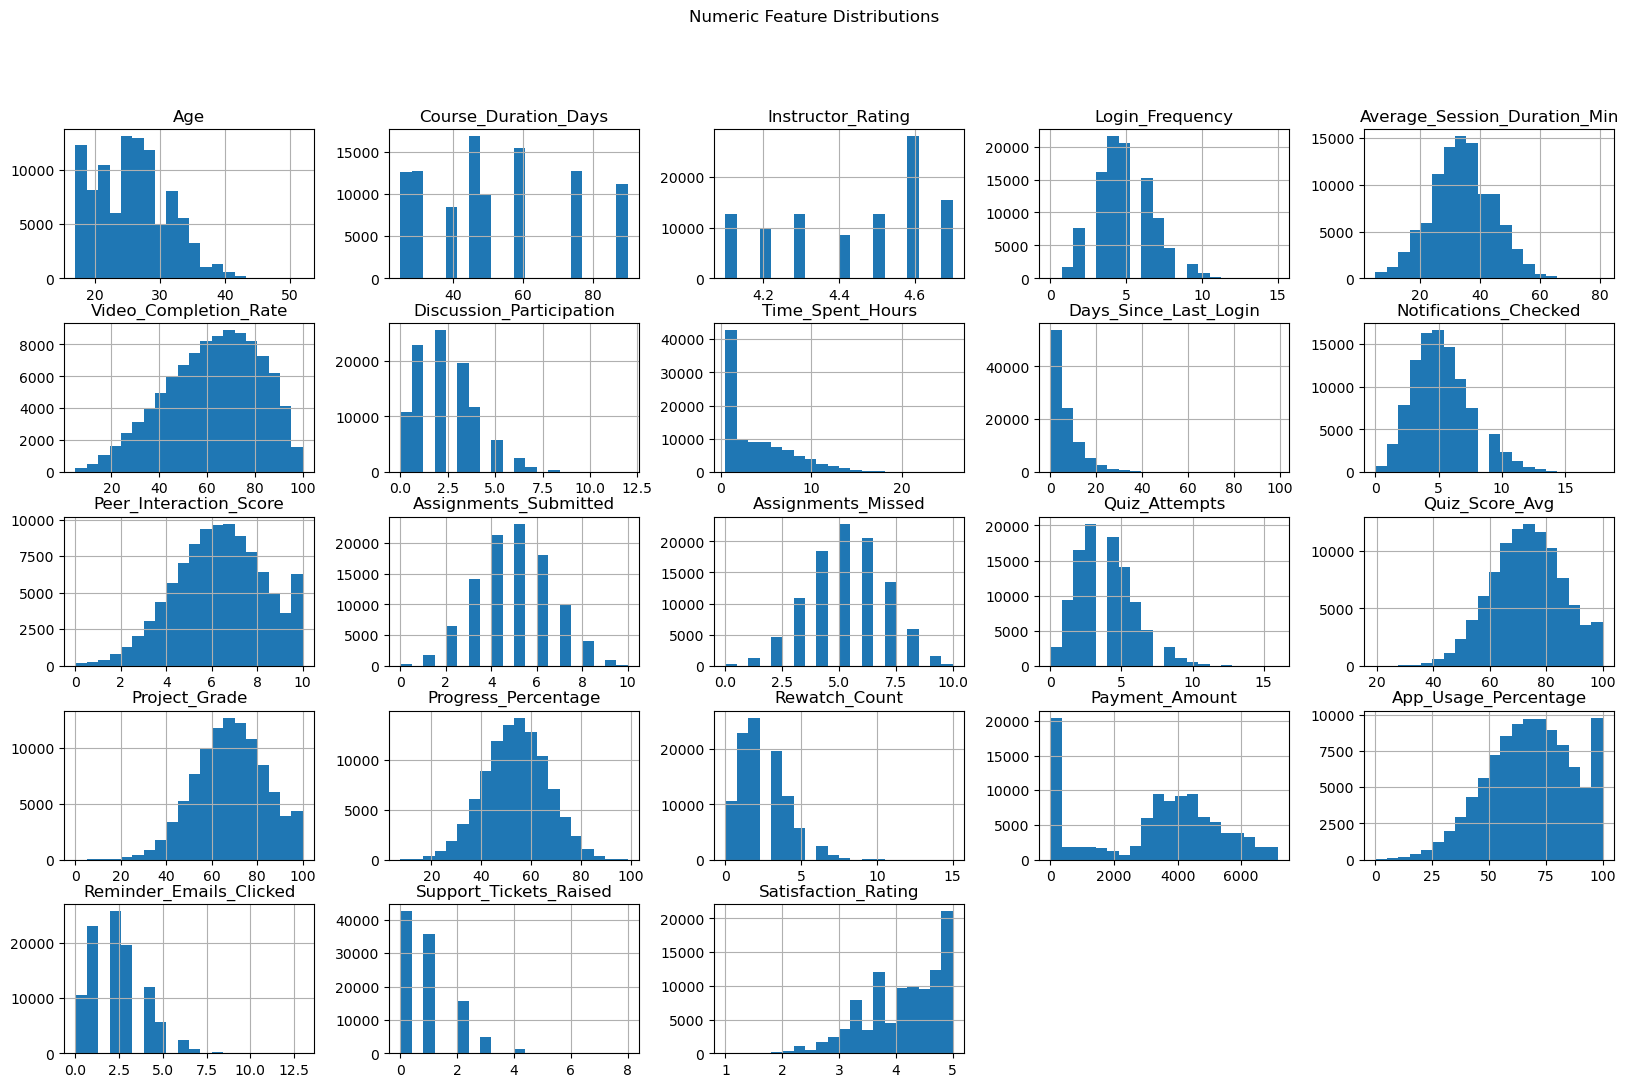

In [50]:
df[num_cols].hist(figsize=(20,12), bins=20)
plt.suptitle("Numeric Feature Distributions")
plt.show()

In [51]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for col in binary_cols:
    df[col] = le.fit_transform(df[col])


In [52]:
df = pd.get_dummies(df, columns=ohe_cols, drop_first=True)


In [53]:
df["Completed"] = le.fit_transform(df["Completed"])


In [ ]:
'''from sklearn.preprocessing import LabelEncoder
label_encoders={}
for col in binary_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le'''

In [ ]:
'''from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse_output=False, drop='first')
ohe_data = ohe.fit_transform(df[ohe_cols])
ohe_df = pd.DataFrame(
    ohe_data,
    columns=ohe.get_feature_names_out(ohe_cols),
    index=df.index
)
df = df.drop(columns=ohe_cols)
df = pd.concat([df, ohe_df], axis=1)'''

In [54]:

df_clean = df.copy()
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    df_clean = df_clean[(df_clean[col] >= lower) & (df_clean[col] <= upper)]
    
print("Original rows:", df.shape[0])
print("Rows after removing outliers:", df_clean.shape[0])
    

Original rows: 100000
Rows after removing outliers: 80823


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 78 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Age                                       100000 non-null  int64  
 1   Course_Duration_Days                      100000 non-null  int64  
 2   Instructor_Rating                         100000 non-null  float64
 3   Login_Frequency                           100000 non-null  int64  
 4   Average_Session_Duration_Min              100000 non-null  int64  
 5   Video_Completion_Rate                     100000 non-null  float64
 6   Discussion_Participation                  100000 non-null  int64  
 7   Time_Spent_Hours                          100000 non-null  float64
 8   Days_Since_Last_Login                     100000 non-null  int64  
 9   Notifications_Checked                     100000 non-null  int64  
 10  Peer_Interaction_Scor

In [56]:
print(course_names)

['Data Analysis with Python', 'Machine Learning A-Z', 'Python Basics', 'UI/UX Design Fundamentals', 'Introduction to AI', 'Digital Marketing Essentials', 'Statistics for Data Science', 'Excel for Business']


In [57]:
y=df['Completed']
X=df.drop('Completed',axis=1)

In [ ]:
'''from sklearn.preprocessing import LabelEncoder
for col in X.select_dtypes(include='object').columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))'''


In [58]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif

selector = SelectKBest(score_func=mutual_info_classif, k=10)
X_selected = selector.fit_transform(X,y)

selected_indices = selector.get_support(indices=True)
selected_features = X.columns[selected_indices].tolist()

print("Selected features:", selected_features)


Selected features: ['Login_Frequency', 'Time_Spent_Hours', 'Assignments_Submitted', 'Assignments_Missed', 'Progress_Percentage', 'Fee_Paid', 'Employment_Status_Student', 'Device_Type_Mobile', 'Internet_Connection_Quality_Medium', 'Category_Programming']


In [59]:
X_selected = X[selected_features]

In [60]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X_selected)




In [ ]:
'''from sklearn.preprocessing import StandardScaler

num_cols = X.select_dtypes(include=["int64", "float64"]).columns
scaler = StandardScaler()

X[num_cols] = scaler.fit_transform(X[num_cols])'''


In [61]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


MODEL 1 LOGISTIC REGRESSION

In [62]:
from sklearn.linear_model import LogisticRegression
model1=LogisticRegression()
model1.fit(X_train,y_train)

LogisticRegression()

In [63]:
y_pred_log=model1.predict(X_test)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

accuracy = accuracy_score(y_test, y_pred_log)
print("Accuracy Score of LR:", accuracy)


Accuracy Score of LR: 0.8641


MODEL 2: RANDOM FOREST CLASSIFIER

In [64]:
from sklearn.ensemble import RandomForestClassifier
model2=RandomForestClassifier(
    n_estimators=200,
    random_state=42
)
model2.fit(X_train,y_train)


RandomForestClassifier(n_estimators=200, random_state=42)

In [65]:
y_pred_rfc=model2.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_rfc)
print("Accuracy Score Oof RFC:", accuracy)


Accuracy Score Oof RFC: 0.95605


MODEL 5: XGBOOSTING

In [66]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df["Completed"] = le.fit_transform(df["Completed"])


In [67]:
from xgboost import XGBClassifier
model5 = XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric='logloss',
    random_state=42
)

model5.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, ...)

In [68]:
y_pred_xgb = model5.predict(X_test)
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))

XGBoost Accuracy: 0.95745


In [69]:
print("Precision:", precision_score(y_test, y_pred_xgb))
print("Recall:", recall_score(y_test, y_pred_xgb))
print("F1 Score:", f1_score(y_test, y_pred_xgb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))


Precision: 0.9748158863755918
Recall: 0.9693977636827307
F1 Score: 0.9720992754335923
Confusion Matrix:
 [[ 4324   383]
 [  468 14825]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.92      0.91      4707
           1       0.97      0.97      0.97     15293

    accuracy                           0.96     20000
   macro avg       0.94      0.94      0.94     20000
weighted avg       0.96      0.96      0.96     20000



In [81]:
df_raw = pd.read_csv("Course_Completion_Predicted.csv")

course_cols = [
    "Course_ID",
    "Course_Name",
    "Category",
    "Course_Level",
    "Course_Duration_Days",
    "Instructor_Rating"
]

course_default_map = (
    df_raw.groupby("Course_Name")[course_cols].first().to_dict(orient="index")
)

joblib.dump(course_default_map, "course_default_map.pkl")

['course_default_map.pkl']

In [82]:
import joblib

joblib.dump(model5, "xgb_model.pkl")                 # model
joblib.dump(scaler, "scaler.pkl")                    # scaler
joblib.dump(selected_features, "selected_features.pkl")  # SelectKBest columns
joblib.dump(le, "label_encoder.pkl")                 # target encoder
joblib.dump(course_names, "course_names.pkl") # dropdown list


['course_names.pkl']

problem statement
dataset
what algorith m choosen
why that algoritham
accuracy acchievde
challednges faced
future improvements